In [7]:
import pandas as pd
import numpy as np
import warnings
from math import sqrt
from pandas import read_csv, datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


**Mounting Google Drive for data file**

In [8]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/trainwalmart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Before doing any modeling using ARIMA or SARIMAS etc we need to Confirm that our time-series is stationary by using Augmented Dick Fuller test or other tests.**

***Let us test whether the sales record of department number 1 is stationary or not using Augmented Dickey-Fuller Test***

In [9]:
V = data[data['Store'] == 1]['Weekly_Sales'].values;

stat, p, lags, obs, crit, t = adfuller(V);
print('stat=%.3f, p=%.3f' % (stat, p));
if p > 0.05:
    print('\nAugmented Dickey-Fuller Unit Root Test on Sample1: Probably not Stationary');
else:
    print('\nAugmented Dickey-Fuller Unit Root Test on Sample1: Probably Stationary');

stat=-3.761, p=0.003

Augmented Dickey-Fuller Unit Root Test on Sample1: Probably Stationary


**Now need to create a list of all groups or get from Data using np.unique or other methods as follows:**

* groups_iter = [x for x in range(1,46)]*

**Let us predict the future sales of Store number 1**

***Now Let us Declare some Dictionaries and LIST***

In [10]:
dict_org = {}
dict_pred = {}
group_accuracy = {}
predictions = []

*Iterate over all groups and get data from Dataframe by filtering for specific group.*
**Here we are considering only one Store as Group 1 i.e. Store number 1 in our case**

Predicted:1242.717143, expected:1450.520000
Predicted:1624.917472, expected:2044.760000
Predicted:2070.511620, expected:4400.060000
Predicted:3811.299938, expected:6483.260000
Predicted:5567.099215, expected:3903.440000
Predicted:4063.673727, expected:293.240000
Predicted:1902.093093, expected:165.030000
Predicted:1847.109506, expected:244.140000
Predicted:1103.275992, expected:225.300000
Predicted:436.879621, expected:223.460000
Predicted:627.110066, expected:148.990000
Predicted:529.088597, expected:325.650000
Predicted:656.855043, expected:277.030000
Predicted:633.150633, expected:132.130000
Predicted:510.782173, expected:191.130000
Predicted:591.046191, expected:223.090000
Predicted:587.694862, expected:194.980000
Predicted:543.945519, expected:217.330000
Predicted:581.530802, expected:273.020000
Predicted:621.931224, expected:133.830000
Predicted:522.291091, expected:214.510000
Predicted:575.246603, expected:157.520000
Predicted:553.234251, expected:107.130000
Predicted:473.850256

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted:3392.120066, expected:3422.490000
Predicted:3600.819214, expected:3318.250000
Predicted:3497.154991, expected:3088.010000
Predicted:3658.848262, expected:3643.400000
Predicted:3840.119746, expected:4840.110000
Predicted:4603.503511, expected:5430.640000
Predicted:5070.944540, expected:4451.850000
Predicted:4801.902557, expected:3539.810000
Predicted:4438.456187, expected:3476.910000
Predicted:4305.634150, expected:2787.230000
Predicted:3566.958923, expected:3115.320000
Predicted:3514.509983, expected:3063.520000
Predicted:3516.102127, expected:2760.090000
Predicted:3163.391724, expected:3064.260000
Predicted:3440.572599, expected:3022.950000
Predicted:3382.415754, expected:3434.690000
Predicted:3573.485954, expected:3700.530000
Predicted:3875.882110, expected:2868.980000
Predicted:3406.268984, expected:2530.740000
Predicted:3236.150879, expected:2945.510000
Predicted:3422.599614, expected:3115.980000
Predicted:3330.854510, expected:3131.560000
Predicted:3364.519587, expected:

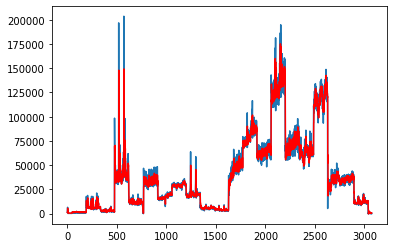

In [11]:
groups_iter = [1]

for i in range(len(groups_iter)):
    X = data[data['Store'] == groups_iter[i]]['Weekly_Sales'].values

    # Split the data into 70% training and 30% testing
    size = int(len(X) * 0.70)
    train, test = X[0:size], X[size:len(X)]

    # Build a list of training records
    history = [x for x in train]
    #train = train.tolist()
    #test = test.tolist()
    
    #integration models: ARIMA(p, d, q): p is the order (number of time lags) of the autoregressive model, d is the degree of differencing 
    #(the number of times the data have had past values subtracted), and q is the order of the moving-average model.
    # Using ARIMA model here you can also do grid search for best parameters
    for t in range(len(test)):
        model = ARIMA(history, order = (4, 0, 1)) # ARIMA: order = (p, d, q)
        model_fit = model.fit(disp = 0)
        output = model_fit.forecast()

        yhat = output[0]
        predictions.append(yhat)
        #predictions.extend(yhat)
        obs = test[t]
        history.append(obs)
        #history.extend(obs)
        print("Predicted:%f, expected:%f" %(yhat, obs))
    
    predictions = np.array(predictions)
    #sklearn.preprocessing.minmax_scale(predictions, feature_range=(0,1))
    #sklearn.preprocessing.minmax_scale(test, feature_range=(0,1))
    print('Complete test record=',test," | Complete test predictions=",predictions)
    #error = mean_squared_log_error(test, predictions)
    error = mean_squared_error(test, predictions)
    dict_org.update({groups_iter[i]: test})
    dict_pred.update({groups_iter[i]: predictions})
    
    print("Group: ", groups_iter[i], "Test MSE:%f"% error)
    group_accuracy.update({groups_iter[i]: error})
    plt.plot(test)
    plt.plot(predictions, color = 'red')
    plt.show()